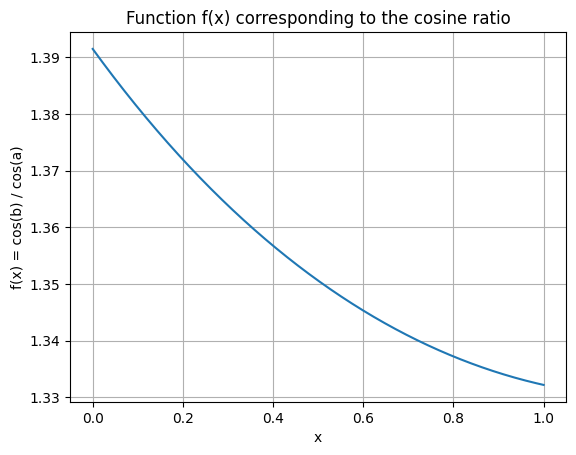

In [7]:
import numpy as np
import matplotlib.pyplot as plt


def calculate_proportion(pro,na = 1,nw = 1.33):
    # 计算角度a
    a_deg = 10 + 25 * (1 - pro)
    a_rad = np.radians(a_deg)

    # 计算余弦比值f(x)
    sin_a = np.sin(a_rad)
    sin_b = (sin_a * na) / nw 
    cos_a = np.sqrt(1 - sin_a**2)
    cos_b = np.sqrt(1 - sin_b**2)
    f_x = (nw / na) * cos_b / cos_a
    return f_x
    
na = 1
nw = 1.33
# 定义x的范围
x = np.linspace(0, 1, 500)

# 计算角度a(10-25)
a_deg = 5 + 20 * (1-x)
a_rad = np.radians(a_deg)

# 计算余弦比值f(x)
sin_a = np.sin(a_rad)
sin_b = (sin_a * na) / nw
cos_a = np.sqrt(1 - sin_a**2)
cos_b = np.sqrt(1 - sin_b**2)
f_x = (nw / na) * (cos_b / cos_a)

# 绘制图像
plt.plot(x, f_x)
plt.xlabel('x')
plt.ylabel('f(x) = cos(b) / cos(a)')
plt.title('Function f(x) corresponding to the cosine ratio')
plt.grid(True)
plt.show()

a_deg = 90
print()


In [ ]:
import cv2
import numpy as np

def refraction_correction(image, water_line, dis, n1=1.0, n2=1.33):
    """
    对图像中水下部分进行折射矫正
    :param image: 输入图像
    :param water_line: 水面的垂直位置（y 坐标）
    :param n1: 空气的折射率
    :param n2: 水的折射率
    :return: 矫正后的图像
    """
    height, width, _ = image.shape
    final_image = image[:water_line,:]
    dis_pixel = (int)(height * dis)

    for y in range(water_line, height, dis_pixel):
    
        pro = calculate_proportion((y + (dis_pixel / 2) - water_line)/water_line,n1,n2)

        bottom_part = image[y:y+dis_pixel,:]
    
        # print("int pro", (int)(pro))
        stretched_bottom = cv2.resize(bottom_part,(width,(int)(dis_pixel*pro)),interpolation=cv2.INTER_LINEAR)

        # 拼接上半部分和拉伸后的下半部分
        final_image = np.vstack((final_image, stretched_bottom))

        # for x in range(width):
        #     # # 计算入射角（假设水面与视线垂直）
        #     # theta1 = np.arctan((y - water_line) / width)

        #     # # 使用 Snell 定律计算折射角，并确保输入值在 [-1, 1] 范围内
        #     # sin_theta2_input = np.clip(n1 / n2 * np.sin(theta1), -1, 1)
        #     # theta2 = np.arcsin(sin_theta2_input)

        #     # # 检查是否计算出了 NaN 或无效的 theta2
        #     # if np.isnan(theta2) or theta2 == 0:
        #     #     continue

            
            
        #     # 计算校正后的 y 坐标
        #     # corrected_y = water_line + (y - water_line) / np.tan(theta2)
        #     corrected_y = water_line + (y - water_line) * pro * n2
        #     print(pro)
        #     # 检查 corrected_y 是否为 NaN 或无效值
        #     if np.isnan(corrected_y) or corrected_y < 0 or corrected_y >= height:
        #         continue

        #     corrected_y = int(corrected_y)
        #     print(corrected_y)
        #     # 更新图像像素
        #     corrected_image[corrected_y, x] = image[y, x]

    return final_image


In [60]:
# 加载图像
image_path = '../examples/imgs/000010.jpg'
image = cv2.imread(image_path)

height, width, _ = image.shape
corrected_image = image.copy()
print("height,", height)
print("water_line,", image.shape[0] * 0.35)

height, 1080
water_line, 378.0


In [61]:
# 假设水面位置为图像的中部
water_line = image.shape[0] * 0.4
# 进行折射矫正
corrected_image = refraction_correction(image, (int)(water_line), 0.00188)

# 显示和保存结果
# cv2.imshow('Corrected Image', corrected_image)
cv2.imwrite('../examples/imgs/corrected_image_00188.jpg', corrected_image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

print("ori pic size:", image.shape)
print("aft pic size:", corrected_image.shape)

height, 1080
y, 432
y, 434
y, 436
y, 438
y, 440
y, 442
y, 444
y, 446
y, 448
y, 450
y, 452
y, 454
y, 456
y, 458
y, 460
y, 462
y, 464
y, 466
y, 468
y, 470
y, 472
y, 474
y, 476
y, 478
y, 480
y, 482
y, 484
y, 486
y, 488
y, 490
y, 492
y, 494
y, 496
y, 498
y, 500
y, 502
y, 504
y, 506
y, 508
y, 510
y, 512
y, 514
y, 516
y, 518
y, 520
y, 522
y, 524
y, 526
y, 528
y, 530
y, 532
y, 534
y, 536
y, 538
y, 540
y, 542
y, 544
y, 546
y, 548
y, 550
y, 552
y, 554
y, 556
y, 558
y, 560
y, 562
y, 564
y, 566
y, 568
y, 570
y, 572
y, 574
y, 576
y, 578
y, 580
y, 582
y, 584
y, 586
y, 588
y, 590
y, 592
y, 594
y, 596
y, 598
y, 600
y, 602
y, 604
y, 606
y, 608
y, 610
y, 612
y, 614
y, 616
y, 618
y, 620
y, 622
y, 624
y, 626
y, 628
y, 630
y, 632
y, 634
y, 636
y, 638
y, 640
y, 642
y, 644
y, 646
y, 648
y, 650
y, 652
y, 654
y, 656
y, 658
y, 660
y, 662
y, 664
y, 666
y, 668
y, 670
y, 672
y, 674
y, 676
y, 678
y, 680
y, 682
y, 684
y, 686
y, 688
y, 690
y, 692
y, 694
y, 696
y, 698
y, 700
y, 702
y, 704
y, 706
y, 708
y, 710
y, 712
